# Notes

## VNA Bringup and Calibration
### Wire checks
To check how much results vary with different COAXes we try performing the experiments with 2 varieties of coax-cables
- A 35 cm SS405 COAX cable delivered with the NanoVNA
- An equally long 35 cm coax bought from aliexpress, with female to male adapter attached [link](https://www.aliexpress.com/store/3516063?spm=a2g0o.order_list.order_list_main.52.1b415c5fTypAqu)

**Test Settings**
- Sweep between 500 MHz and 1.5 GHz
- Enable 1024 Testpoints (Serial port control > Manage > Datapoints)
- Logarithmic sweep (averaged)
- Number of measurements to average: 3 (multiple x 1024 measurements made)

Images as well as touchstone parameters can be found in the VNA-folder.

<span style="color: red;">WARNING: Make sure to connect the right end-coaxes depending on which calibration is ongoing (open, load, short).</span>


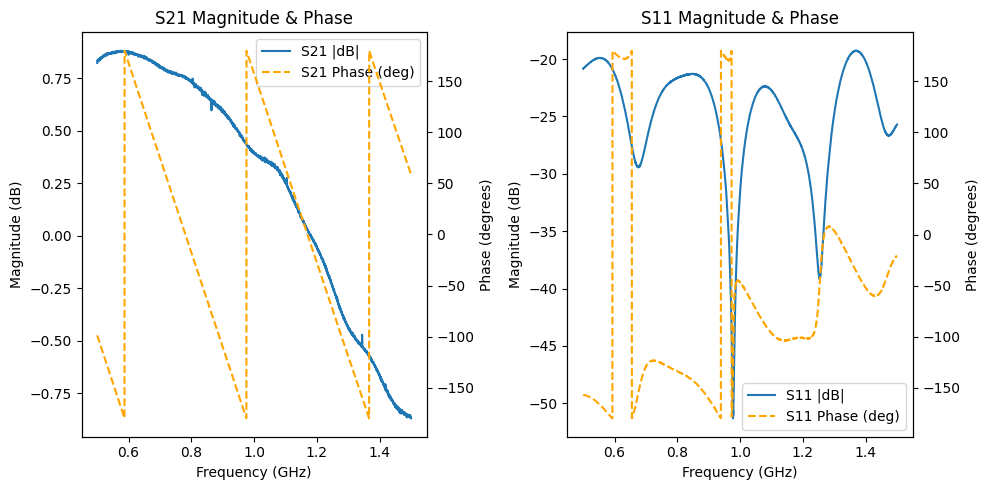

In [15]:
import skrf as rf
import matplotlib.pyplot as plt

# Load the S-parameter file (Touchstone format).
# Adjust the path/filename as needed:
filename = "data/double_coax_no_calib.s2p"
ntwk = rf.Network(filename)

# Convert frequency from Hz to GHz for plotting
freq_ghz = ntwk.f / 1e9

# Create a figure and 2 side-by-side subplots
fig, (ax_s21, ax_s11) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# --------------------------
# Subplot 1: S21
# --------------------------
ax_s21_phase = ax_s21.twinx()  # second y-axis for phase

# Plot S21 magnitude (dB) on the left y-axis
mag_s21 = ntwk.s21.s_db.flatten()
ax_s21.plot(freq_ghz, mag_s21, label="S21 |dB|")
ax_s21.set_xlabel("Frequency (GHz)")
ax_s21.set_ylabel("Magnitude (dB)")

# Plot S21 phase (degrees) on the right y-axis
phase_s21 = ntwk.s21.s_deg.flatten()
ax_s21_phase.plot(freq_ghz, phase_s21, label="S21 Phase (deg)", linestyle="--", color="orange")
ax_s21_phase.set_ylabel("Phase (degrees)")

# Combine legends for magnitude and phase in the first subplot
lines1, labels1 = ax_s21.get_legend_handles_labels()
lines2, labels2 = ax_s21_phase.get_legend_handles_labels()
ax_s21.legend(lines1 + lines2, labels1 + labels2, loc="best")

ax_s21.set_title("S21 Magnitude & Phase")

# --------------------------
# Subplot 2: S11
# --------------------------
ax_s11_phase = ax_s11.twinx()  # second y-axis for phase

# Plot S11 magnitude (dB) on the left y-axis
mag_s11 = ntwk.s11.s_db.flatten()
ax_s11.plot(freq_ghz, mag_s11, label="S11 |dB|")
ax_s11.set_xlabel("Frequency (GHz)")
ax_s11.set_ylabel("Magnitude (dB)")

# Plot S11 phase (degrees) on the right y-axis
phase_s11 = ntwk.s11.s_deg.flatten()
ax_s11_phase.plot(freq_ghz, phase_s11, label="S11 Phase (deg)", linestyle="--", color="orange")
ax_s11_phase.set_ylabel("Phase (degrees)")

# Combine legends for magnitude and phase in the second subplot
lines3, labels3 = ax_s11.get_legend_handles_labels()
lines4, labels4 = ax_s11_phase.get_legend_handles_labels()
ax_s11.legend(lines3 + lines4, labels3 + labels4, loc="best")

ax_s11.set_title("S11 Magnitude & Phase")

plt.tight_layout()
plt.show()

### Conclusion
- The 2x35 cm coaxial wires with the connector in-between seem to cause a 2-db power loss.
- This seems to be ok for an LNA with an expected gain of 20 dB. 
- It does seem bad for antenna matching based on return loss.

# FAQ
## Calibration
### Short calibration
Connecting 2 ports using a 50 ohm COAX
- For a 2-port calibration, make sure to connect 2 coaxes together here.
- A short coax-connector comes with the nanovna

### Load calibration
Terminate both ends with a known 50 ohm end, check reflections.
- There's a 50 ohm termination that comes with the NanoVNA.

### Isolation calibration
Making sure there is no input signal between ports (measuring crosstalk / leakage in the system) -> often also by ataching 2 isolated loads.
- An isolated coax connector comes with the NanoVNA

### Thrurefir Calibration


### Electrical delay
#### Description
- This should normally be a linear function of the frequency in an ideal transmission line.
	- The electrical delay / group delay $\tau = \frac{d\phi}{d\omega} = \frac{l}{v_{p}}$
	- So the electrical delay is rate of phase shift change with frequency. 


#### Method for a single port
- Make sure to short the end of the cable
	- We got a short together with the NanoVNA
- Measure the phase response
- Then compensate for this phase response

NOTE: This group delay is constant for that specific medium, of that specific length for all frequencies.

#### Method for dual port 
For this purpose the FULL calibration needs to be done!!!
- Full 2-port SOLT (open, short, load on each port)

## Naming conventions
- S1P files are named as <parameter_measured>_<coax/nocoax>_<measurement_version>.s1p

e.g.: S11_coax_v0.s1p means
- Means the single-port measurement was done with 
	- a coax attached to the port
	- the calibration done with the coax attached
	- the measurement version: the notes should describe what exactly was changed with respect to the previous version.

### 2-port group delay
Can we set a 3.2 ns as the port-1 group delay, but connect both endpoints with a 1.6 ns group-delay transmission line? Or should we absolutely have 2 separate delays on each port?

We can't, since a phase-delay propagating through the DUT might come out differently in port 2 then if the phase delay was applied at port 2.

### Differences in 2-port calibration vs single-port calibration
For some reason when doing 2-port calibration the measured results are completely off from a single-port calibration situation. 
Although I am using the exact same data for the first 3 tests for port 1 (short, open, loaded)

# Sources
- https://www.microwaves101.com/encyclopedias/network-analyzer-measurements
- NanoVNA reliability: http://thestone.zone/radio/2021/12/22/trusting-nanovna.html
